In [1]:
import pandas as pd
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [2]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [13]:
df['signup_date'] = pd.to_datetime(df['signup_date'], infer_datetime_format=True)
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [12]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df['days_since_last_trip'] = (df.last_trip_date.max() - df['last_trip_date']).dt.days
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108


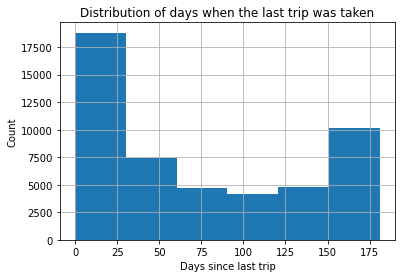

In [205]:
df.days_since_last_trip.hist(bins=6)
plt.xlabel('Days since last trip')
plt.ylabel('Count')
plt.title('Distribution of days when the last trip was taken');

The first tall column is the active subscribers. The last bin are the customers that dropped off within the first month, which is the largest amount.

In [202]:
# about half of the subscribers were not active in the last month
# subset the dataset and see if there is a trend
df[df[last_trip_date]>='2014-06-17']

31200.0

In [18]:
df.loc[df['days_since_last_trip']<=30, 'active'] = 1
df.loc[df['days_since_last_trip']>30, 'active'] = 0
print("Fraction active:", round(df['active'].sum()/len(df), 3))

Fraction active: 0.376


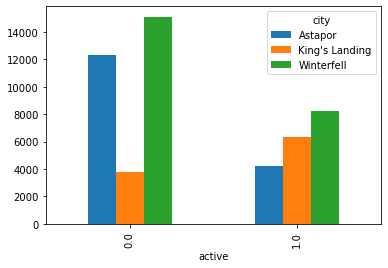

In [21]:
df.groupby(['city','active'])['active'].count().unstack(level=0).plot(kind='bar')

The city does seam to matter.

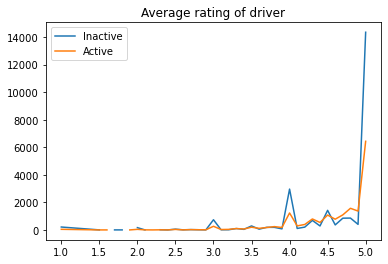

In [50]:
import matplotlib.pyplot as plt
ave_rating_sum = df.groupby(['avg_rating_of_driver','active'])['active'].count().unstack(level=1)
plt.plot(ave_rating_sum[0.0], label='Inactive')
plt.plot(ave_rating_sum[1.0], label='Active')
plt.title('Average rating of driver')
plt.legend();

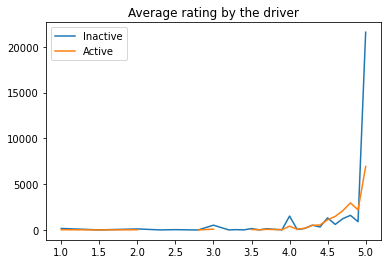

In [51]:
ave_rating_sum = df.groupby(['avg_rating_by_driver','active'])['active'].count().unstack(level=1)
plt.plot(ave_rating_sum[0.0], label='Inactive')
plt.plot(ave_rating_sum[1.0], label='Active')
plt.title('Average rating by the driver')
plt.legend();

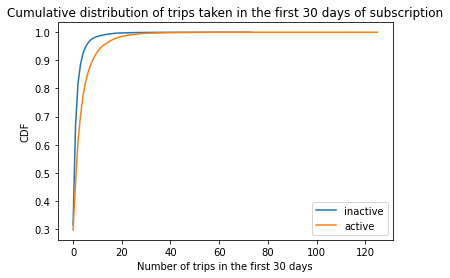

In [65]:
init_trips_0 = df[df['active']==0].groupby('trips_in_first_30_days')['trips_in_first_30_days'].agg('count').sort_index()
init_trips_0_cdf = init_trips_0.cumsum()
init_trips_0_cdf = init_trips_0_cdf/init_trips_0_cdf.max()
init_trips_1 = df[df['active']==1].groupby('trips_in_first_30_days')['trips_in_first_30_days'].agg('count').sort_index()
init_trips_1_cdf = init_trips_1.cumsum()
init_trips_1_cdf = init_trips_1_cdf/init_trips_1_cdf.max()
plt.plot(init_trips_0_cdf, label='inactive')
plt.plot(init_trips_1_cdf, label='active')
plt.xlabel('Number of trips in the first 30 days')
plt.ylabel('CDF')
plt.title('Cumulative distribution of trips taken in the first 30 days of subscription')
plt.legend();

active users take more rides in the first 30 days.

In [63]:
init_trips_0_cdf[init_trips_0_cdf<=0.9]

trips_in_first_30_days
0    0.314463
1    0.666528
2    0.815874
3    0.883030
Name: trips_in_first_30_days, dtype: float64

In [64]:
init_trips_1_cdf[init_trips_1_cdf<=0.9]

trips_in_first_30_days
0    0.296745
1    0.462933
2    0.608807
3    0.698841
4    0.768666
5    0.817911
6    0.852850
7    0.878802
8    0.899489
Name: trips_in_first_30_days, dtype: float64

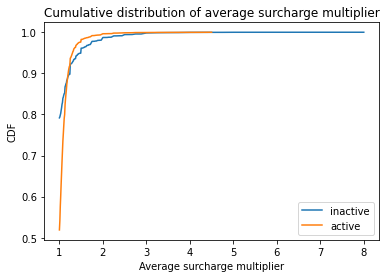

In [66]:
init_trips_0 = df[df['active']==0].groupby('avg_surge')['avg_surge'].agg('count').sort_index()
init_trips_0_cdf = init_trips_0.cumsum()
init_trips_0_cdf = init_trips_0_cdf/init_trips_0_cdf.max()
init_trips_1 = df[df['active']==1].groupby('avg_surge')['avg_surge'].agg('count').sort_index()
init_trips_1_cdf = init_trips_1.cumsum()
init_trips_1_cdf = init_trips_1_cdf/init_trips_1_cdf.max()
plt.plot(init_trips_0_cdf, label='inactive')
plt.plot(init_trips_1_cdf, label='active')
plt.xlabel('Average surcharge multiplier')
plt.ylabel('CDF')
plt.title('Cumulative distribution of average surcharge multiplier')
plt.legend();

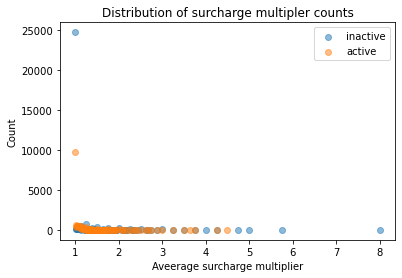

In [70]:
plt.scatter(init_trips_0.index, init_trips_0, alpha=0.5, label='inactive')
plt.scatter(init_trips_1.index, init_trips_1, alpha=0.5, label='active')
plt.legend()
plt.xlabel('Aveerage surcharge multiplier')
plt.ylabel('Count')
plt.title('Distribution of surcharge multipler counts');

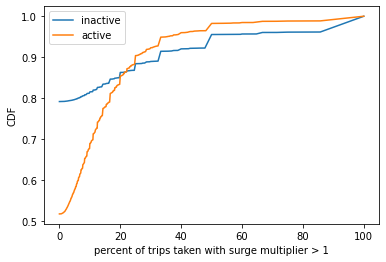

In [55]:
init_trips_0 = df[df['active']==0].groupby('surge_pct')['surge_pct'].agg('count').sort_index()
init_trips_0_cdf = init_trips_0.cumsum()
init_trips_0_cdf = init_trips_0_cdf/init_trips_0_cdf.max()
init_trips_1 = df[df['active']==1].groupby('surge_pct')['surge_pct'].agg('count').sort_index()
init_trips_1_cdf = init_trips_1.cumsum()
init_trips_1_cdf = init_trips_1_cdf/init_trips_1_cdf.max()
plt.plot(init_trips_0_cdf, label='inactive')
plt.plot(init_trips_1_cdf, label='active')
plt.xlabel('percent of trips taken with surge multiplier > 1')
plt.ylabel('CDF')
plt.legend();

Incative users took more trips with higher surcharge.

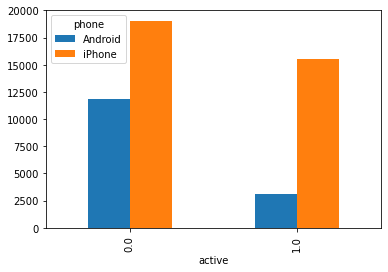

In [53]:
df.groupby(['phone','active'])['active'].count().unstack(level=0).plot(kind='bar')

In [73]:
dev_summary = df.groupby(['phone','active'])['active'].count()
print('Inactive Android user fraction', dev_summary.loc['Android',0.0]/(dev_summary.loc['Android',0.0]+dev_summary.loc['Android',1.0]))
print('Active Android user fraction', dev_summary.loc['Android',1.0]/(dev_summary.loc['Android',0.0]+dev_summary.loc['Android',1.0]))
print('Inactive iPhone user fraction', dev_summary.loc['iPhone',0.0]/(dev_summary.loc['iPhone',0.0]+dev_summary.loc['iPhone',1.0]))
print('Active iPhone user fraction', dev_summary.loc['iPhone',1.0]/(dev_summary.loc['iPhone',0.0]+dev_summary.loc['iPhone',1.0]))

Inactive Android user fraction 0.7905738250565837
Active Android user fraction 0.2094261749434163
Inactive iPhone user fraction 0.5510670290902782
Active iPhone user fraction 0.44893297090972184


iPhone users more likely to be active than Android users.

In [56]:
df.groupby(['ultimate_black_user', 'active'])['active'].count()

ultimate_black_user  active
False                0.0       21839
                     1.0        9307
True                 0.0        9357
                     1.0        9497
Name: active, dtype: int64

In [74]:
ult_black_summary = df.groupby(['ultimate_black_user', 'active'])['active'].count()
print(ult_black_summary.loc[False, 0.0]/(ult_black_summary.loc[False, 0.0]+ult_black_summary.loc[False, 1.0]))
print(ult_black_summary.loc[False, 1.0]/(ult_black_summary.loc[False, 0.0]+ult_black_summary.loc[False, 1.0]))
print(ult_black_summary.loc[True, 0.0]/(ult_black_summary.loc[True, 0.0]+ult_black_summary.loc[True, 1.0]))
print(ult_black_summary.loc[True, 1.0]/(ult_black_summary.loc[True, 0.0]+ult_black_summary.loc[True, 1.0]))

0.7011815321389585
0.29881846786104155
0.4962872599978784
0.5037127400021215


~ 50% of active users are ultimate black users, while ~30% of inactive users are ultimate black users. So this status seams important.

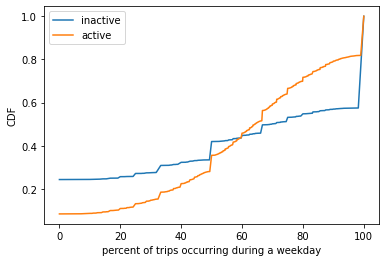

In [57]:
init_trips_0 = df[df['active']==0].groupby('weekday_pct')['weekday_pct'].agg('count').sort_index()
init_trips_0_cdf = init_trips_0.cumsum()
init_trips_0_cdf = init_trips_0_cdf/init_trips_0_cdf.max()
init_trips_1 = df[df['active']==1].groupby('weekday_pct')['weekday_pct'].agg('count').sort_index()
init_trips_1_cdf = init_trips_1.cumsum()
init_trips_1_cdf = init_trips_1_cdf/init_trips_1_cdf.max()
plt.plot(init_trips_0_cdf, label='inactive')
plt.plot(init_trips_1_cdf, label='active')
plt.xlabel('percent of trips occurring during a weekday')
plt.ylabel('CDF')
plt.legend();

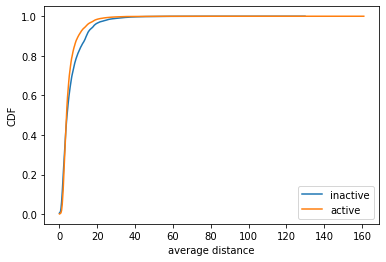

In [58]:
init_trips_0 = df[df['active']==0].groupby('avg_dist')['avg_dist'].agg('count').sort_index()
init_trips_0_cdf = init_trips_0.cumsum()
init_trips_0_cdf = init_trips_0_cdf/init_trips_0_cdf.max()
init_trips_1 = df[df['active']==1].groupby('avg_dist')['avg_dist'].agg('count').sort_index()
init_trips_1_cdf = init_trips_1.cumsum()
init_trips_1_cdf = init_trips_1_cdf/init_trips_1_cdf.max()
plt.plot(init_trips_0_cdf, label='inactive')
plt.plot(init_trips_1_cdf, label='active')
plt.xlabel('average distance')
plt.ylabel('CDF')
plt.legend();

## EDA summary
1. city	- important variable, ~1/4 of Astapor users areactive, while >1/2 of King's lanfding users are active, although this city also has the lowest number of subscribers, ~1/3 of Winterfell users are active, this city also has the largest number of subscribers.
2. trips_in_first_30_days - important variable; 90% of inactive users take up to 3 trips in the first 30 days, while 90% of active users take up to 8 trips in the same timeframe	
3. avg_rating_of_driver	- doesn't look important, distributions are similar with active and inactive users
4. avg_surge - 50% of active users took rides without surcharge, while 80% of inactive users took rides wihout surcharge, it seams that, on average, active users mind the surcharge less than inactive users. Interestingly, the remaining 20% of inactive users took rides with more surcharge tham the remaining 50% of active users, so while half of active users did not mind the surcharge, they prefered smaller surcharge.	
5. phone - important 21% of Android users are active and 45% of iPhone users are active, overall more iPhone users.	
6. surge_pct - this is related to average surcharge and is redundant	
7. ultimate_black_user - looks important; 50% of ultimate black users are active, 30% of non-users are active, although there are a lot more people that do not use the service.
8. weekday_pct - the two distributions are different, 25% of inactive users only used the service on weekends, while ~50% used the service exclusively on weekdays. While for active users there are representative customers in all buckets of weekday use. One reason for such uneven distribution of inactive users could be that those people where one offs, used the service once during a weekend or a weekend and then stopped using the service all together.
9. avg_dist	- almost identical, the incactive users traveld slightly longer distances than active users
10. avg_rating_by_driver - doesn't look important, distributions are similar with active and inactive users

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  days_since_last_trip    50000 non-null  int64 

In [76]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'days_since_last_trip', 'active'],
      dtype='object')

In [139]:
# data processing steps 
# 1. impute the mode of the column for missing values
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna(df['phone'].mode()[0], inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

# 2. use standard scaler to normalize numerical values
numerical_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', \
                  'avg_dist', 'avg_rating_by_driver']
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df[numerical_cols])
#scaled_features = pd.DataFrame(scaled_features, columns=numerical_cols)
scaled_features = df[numerical_cols]

# 3. one-hot-encode categorical features
categorical_cols = ['city', 'phone', 'ultimate_black_user']
cat_encoded = pd.get_dummies(df[categorical_cols], prefix_sep='_', columns=categorical_cols, drop_first=True) 

# combine categorical and numerical features
all_features = pd.concat([scaled_features, cat_encoded], axis=1)

X=all_features.values
y=df.active.values
import numpy as np

print(X.shape)
print(y.shape)

all_features.head()

(50000, 11)
(50000,)


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0


In [196]:
F, pval = f_classif(X, y)
stat_summary = pd.DataFrame({'features':all_features.columns.tolist(), 'F scores':F, 'P values':pval})
stat_summary

,features,F scores,P values
0,trips_in_first_30_days,2317.293863,0.000000e+00
1,avg_rating_of_driver,5.863525,1.546134e-02
2,avg_surge,0.555461,4.560984e-01
3,surge_pct,6.958853,8.343129e-03
4,weekday_pct,4.697940,3.020350e-02
5,avg_dist,434.124927,5.270976e-96
6,avg_rating_by_driver,35.797070,2.204618e-09
7,city_King's Landing,3693.587343,0.000000e+00
8,city_Winterfell,108.859430,1.850322e-25
9,phone_iPhone,2677.716941,0.000000e+00


In [190]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020, stratify=y)

# confirm stratified split
print(y_train.sum()/y.sum())
print(y_test.sum()/y.sum())

0.6700170176558179
0.3299829823441821


In [191]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(class_weight='balanced', n_jobs=-1, random_state=2020)
lrcv.fit(X_train, y_train)
print(lrcv.coef_)
print(lrcv.intercept_)

[[ 1.22674518e-01 -6.44815372e-02 -1.75551602e-01  4.06748743e-03
  -4.47694233e-04 -3.42774920e-02 -1.90128773e-01  1.64063315e+00
   4.62576170e-01  1.06138403e+00  8.51443164e-01]]
[-0.39547703]


In [197]:
weights = pd.Series(np.squeeze(lrcv.coef_))
stat_summary = pd.concat([stat_summary, weights], axis=1)
stat_summary.columns=['features', 'F scores','P values', 'weights']
stat_summary

,features,F scores,P values,weights
0,trips_in_first_30_days,2317.293863,0.000000e+00,0.122675
1,avg_rating_of_driver,5.863525,1.546134e-02,-0.064482
2,avg_surge,0.555461,4.560984e-01,-0.175552
3,surge_pct,6.958853,8.343129e-03,0.004067
4,weekday_pct,4.697940,3.020350e-02,-0.000448
5,avg_dist,434.124927,5.270976e-96,-0.034277
6,avg_rating_by_driver,35.797070,2.204618e-09,-0.190129
7,city_King's Landing,3693.587343,0.000000e+00,1.640633
8,city_Winterfell,108.859430,1.850322e-25,0.462576
9,phone_iPhone,2677.716941,0.000000e+00,1.061384


In [198]:
y_pred = lrcv.predict(X_test)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
print(cm)

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75     10295
         1.0       0.59      0.67      0.63      6205

    accuracy                           0.70     16500
   macro avg       0.69      0.70      0.69     16500
weighted avg       0.71      0.70      0.71     16500

[[0.72054395 0.27945605]
 [0.32860596 0.67139404]]


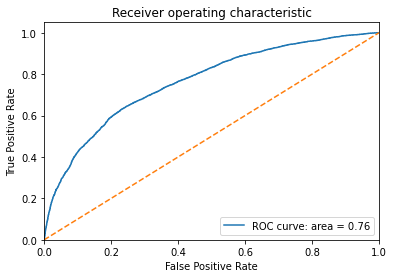

In [199]:
from sklearn.metrics import roc_curve, auc
y_prob = lrcv.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc=auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve: area = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Summary of predictive modeling
I included all the identified features (see EDA) in the analysis since ANOVA analysis demonstrated feature mean values were significantly diffrent between active and inactive subscribers for all features at a significance level 0.05. Next, I picked logistic regression for prediction since its coefficients (feature weights) are easily interpretable and can provide insights for improving retention. I split the data into 70% train and 30% test. I performed training with 5-fold cross-validation on the training set and evaluated the results on the test set.

### Results
The model has 70% accuracy in predicting the subscribers activity status after 6 months, with are under receiver operating characteristic of 0.76. Since active users comprise ~1/3 of the dataset, the labels are not heavily imbalanced, hence accuracy and AROC are reasonable metrics for performance evaluation.

### Takeaways from the model
The features with larset weights are: city_King's Landing, phone_iPhone, ultimate_black_user_True. To improve customer retention it is probably worth looking into reasons why those features have larger contributions.
city_King's Landing - Is there a large proportion of wealthier individuals? Are there less car ownership (urban)? Is local marketing different for this city? If King's landing is largely urban, it is worth replicating this sucsess in other similar cities.
phone_iPhone - is there a substaintial difference in the performacnce of altimate app on different mobile devices? Perhaps android users are having a bad experience? Perhaps reaching out to android users and asking for feedback may help improve the android app and increase subscriber retention.
ultimate_black_user_True - it looks like subscribers using the ultimate black car service in the first 30 days of subscription are more likely to stay active. Perhaps the company can use incentives to encouradge the black car service use in the first 30 days. This also aligns with the observation that the largest proportion of customers drop out within the first month. Hence, in general, encouraging the service use in the first month might be beneficial for increasing customer retention.

### Risks
It is possibe that there are seasonal variations affecting the current model. For example, people sign up in January, when it is cold and as the weather warms up, they use the service less. Replicting the model on a summer cohort will provide more confidence in its generalizability.